In [ ]:
import os
import pathlib

import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

import ipcmagic
import ipyparallel as ipp

# retina matplotlib magic

/opt/python/3.9.4.1/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [ ]:
import os
from os.path import join as opj
import numpy as np
import healpy as hp

import plancklens

from plancklens.sims import maps, phas



In [ ]:
import sys

sys.path.append(".././")

version = "bornVGiulio"
version = ""

from params import S4n32NonMPI as SOB

In [ ]:
from os.path import join as opj

from plancklens import utils

cls_path = opj(os.environ["HOME"], "fgcmblensing", "input", "giulio")
cls_unl = utils.camb_clfile(opj(cls_path, "lensedCMB_dmn1_lenspotentialCls.dat"))
cls_len = utils.camb_clfile(opj(cls_path, "lensedCMB_dmn1_lensedCls.dat"))
cls_grad = SOB.camb_clfile_gradient(opj(cls_path, "lensedCMB_dmn1_lensedgradCls.dat"))

ll = [cls_unl, cls_len, cls_grad]
for l in ll:
    for k, v in l.items():
        l[k] = np.nan_to_num(v)

In [ ]:
"""
np.save("cls_unl", cls_unl)
np.save("cls_len", cls_len)
np.save("cls_grad", cls_grad)
transf_tlm   =  SOB.gauss_beam(SO.beam/180 / 60 * np.pi, lmax=SO.lmax_ivf) * (np.arange(SO.lmax_ivf + 1) >= SO.lmin_tlm)
transf_elm   =  SOB.gauss_beam(SO.beam/180 / 60 * np.pi, lmax=SO.lmax_ivf) * (np.arange(SO.lmax_ivf + 1) >= SO.lmin_tlm)
transf_blm   =  SOB.gauss_beam(SO.beam/180 / 60 * np.pi, lmax=SO.lmax_ivf) * (np.arange(SO.lmax_ivf + 1) >= SO.lmin_tlm)
fidcls_noise = {'tt': ( (SO.nlev_t / 180 / 60 * np.pi) * SOB.utils.cli(transf_tlm) ) ** 2,
                             'ee': ( (SO.nlev_p / 180 / 60 * np.pi) * SOB.utils.cli(transf_elm) ) ** 2,
                             'bb': ( (SO.nlev_p / 180 / 60 * np.pi) * SOB.utils.cli(transf_blm) ) ** 2  }
np.save("fidcls_noise", fidcls_noise)
"""

In [5]:
cases = SOB.cases
get_info = SOB.get_info
get_all = SOB.get_all

In [6]:
Simulationsdir = pathlib.Path(os.environ["SCRATCH"]) / "SKYSIMS/GIULIOSIMS/"

In [7]:
keyB = "NL Born"
keyBg = "NL Born Gauss"
keyBr = "NL Born Rand"
keyBL = "NL Born Lognormal"
keyBLr = "NL Born Lognormal Rand"


keyBLs = "NL Born Lognormal Double Skew"
keyBLsr = "NL Born Lognormal Rand Double Skew"

In [8]:
# cases = [SOB.casolog, SOB.casorandlog, SOB.casogauss]
# keys = [keyBL, keyBLr, keyBg]#, keyBLr, keyBL]

# cases = [SOB.casologdoubleskew, SOB.casorandlogdoubleskew, SOB.casogauss]
# keys = [keyBL, keyBLr, keyBg]#, keyBLr, keyBL]

cases = [SOB.casostd, SOB.casorand, SOB.casogauss]
keys = [keyB, keyBr, keyBg]

In [9]:
keys = [keyB, keyBr, keyBg]  # [keyBL, keyBLr, keyBg]#, keyBLr, keyBL]
keys

['NL Born', 'NL Born Rand', 'NL Born Gauss']

In [10]:
SOdict = {k: c for k, c in zip(cases, keys)}
SOdict

{'': 'NL Born', 'rand': 'NL Born Rand', 'gauss': 'NL Born Gauss'}

In [11]:
tt = cls_len["tt"]
ee = cls_len["ee"]
pp = cls_unl["pp"]

In [12]:
def get_sim_len_lib(case):
    _, _, _, _, analysis_info, sims_cmb_len = get_all(case)
    return sims_cmb_len


def get_analysis_info(case):
    _, _, _, _, analysis_info, _ = get_all(case)
    return analysis_info

In [13]:
get_info(cases[0])


def gettemplensing(case):
    _, _, suffixLensing, _ = get_info(case)
    return opj(os.environ["SCRATCH"], "n32", suffixLensing, "lenscarfrecs")

In [14]:
class Config(object):
    def __init__(
        self,
        cls_unl,
        cls_len,
        cls_weight,
        nlev_t=7.0,
        beam=1.7,
        lmax_qlm=4500,
        lminrec=40,
        lmaxrec=4000,
    ):

        self.nlev_t = nlev_t
        self.nlev_p = np.sqrt(2) * self.nlev_t
        self.beam = beam

        self.lmin_tlm = lminrec
        self.lmax_ivf = lmaxrec

        self.lmax_qlm = lmax_qlm

        self.cls_unl = cls_unl
        self.cls_len = cls_len
        self.cls_weight = cls_weight


qe_key = "ptt"

analysis_info = get_analysis_info(cases[0])

nlev_t = analysis_info["nlev_t"]
nlev_p = nlev_t * np.sqrt(2)
beam = analysis_info["beam"]
cls_unl_fid = cls_unl
lmin_tlm, lmax_ivf = analysis_info["lmin_tlm"], analysis_info["lmax_ivf"]
lmax_qlm = analysis_info["lmax_qlm"]

SO = Config(
    cls_unl,
    cls_len,
    cls_grad,
    nlev_t=nlev_t,
    beam=beam,
    lmax_qlm=lmax_qlm,
    lminrec=lmin_tlm,
    lmaxrec=lmax_ivf,
)

Working on case  with suffix S4Giulio S4Giulio S4GiulioBorn


/home/users/d/darwish/.local/lib/python3.10/site-packages/plancklens/utils.py:124: RuntimeWarning: overflow encountered in cast
  return hashlib.sha1(np.copy(cl.astype(dtype), order='C')).hexdigest()


In [15]:
sim_len_libs = {c: get_sim_len_lib(c) for c in SOdict.keys()}

Working on case  with suffix S4Giulio S4Giulio S4GiulioBorn
Working on case rand with suffix S4GiulioBornRand S4Giulio S4GiulioBornRand
Working on case gauss with suffix S4GiulioBornGauss S4Giulio S4GiulioBornGauss


## Plot QE reconstruction

In [16]:
key = qe_key

In [17]:
Nsims = 32
simset = range(Nsims)

In [18]:
from plancklens.qcinv.util_alm import alm_copy as palm_copy

In [19]:
from healpy import Alm


def palm_copy(alm, lmax=None):
    """Copies the alm array, with the option to reduce its lmax."""
    if hasattr(alm, "alm_copy"):
        return alm.alm_copy(lmax=lmax)

    lmox = Alm.getlmax(len(alm))
    assert lmax <= lmox

    if (lmox == lmax) or (lmax is None):
        ret = np.copy(alm)
    else:
        ret = np.zeros(Alm.getsize(lmax), dtype=np.complex128)
        for m in range(0, lmax + 1):
            ret[
                ((m * (2 * lmax + 1 - m) // 2) + m) : (
                    m * (2 * lmax + 1 - m) // 2 + lmax + 1
                )
            ] = alm[
                ((m * (2 * lmox + 1 - m) // 2) + m) : (
                    m * (2 * lmox + 1 - m) // 2 + lmax + 1
                )
            ]
    return ret

In [20]:
input_plm_maps = {
    k: (palm_copy(sims_cmb_len.get_sim_plm(i), lmax=lmax_qlm) for i in simset)
    for k, sims_cmb_len in sim_len_libs.items()
}

In [21]:
temps = {c: gettemplensing(c) for c in cases}

In [ ]:
list(SOdict.keys())

In [ ]:
12

In [23]:
from lenscarf.iterators import statics

plms_QE_dict = {
    c: (
        np.load(f"{temps[c]}/{key}_sim{i:04}{version}/normalized_phi_plm_it000.npy")
        for i in simset
    )
    for c in SOdict.keys()
}

p2k = np.arange(4001) * np.arange(1, 4002) * 0.5

In [24]:
# plm_in_ins = input_plm_maps #{k: [palm_copy(d_, lmax = lmax_qlm) for d_ in d] for k, d in input_plm_maps.items()} #GF input postborn + NL map
auto_in = {k: [hp.alm2cl(p) for p in plm_in] for k, plm_in in input_plm_maps.items()}

Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim


KeyboardInterrupt: 

In [ ]:
crosses_dict = {
    k: [hp.alm2cl(r, p) for r, p in zip(plms_QE_dict[k], plm_in)]
    for k, plm_in in input_plm_maps.items()
}

In [ ]:
mean = lambda x: np.mean(x, axis=0)

/tmp/ipykernel_208536/3667975814.py:6: RuntimeWarning: invalid value encountered in divide
  plt.loglog(mean(auto_in[key_])/mean(auto_in[cases[0]]), label = f'Auto IN {SOdict[key_]}/Auto IN {SOdict[cases[0]]}', alpha = alpha, ls = ls)


Text(0, 0.5, '$r_L$')

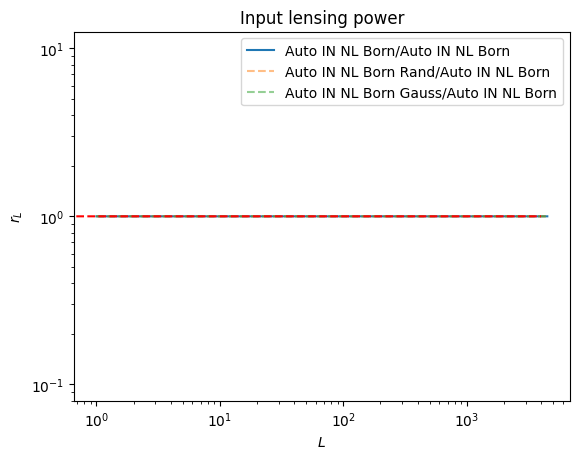

In [ ]:
plt.title("Input lensing power")

for key_ in SOdict.keys():
    alpha = 0.5 if key_ != cases[0] else 1.0
    ls = "--" if key_ != cases[0] else "-"
    plt.loglog(
        mean(auto_in[key_]) / mean(auto_in[cases[0]]),
        label=f"Auto IN {SOdict[key_]}/Auto IN {SOdict[cases[0]]}",
        alpha=alpha,
        ls=ls,
    )

# plt.loglog(auto_in[keyB]/auto_in[keyPB], label = f'Auto IN {keyB}/Auto IN {keyPB}')
# plt.loglog(auto_in[keyBr]/auto_in[keyPB], label = f'Auto IN {keyBr}/Auto IN {keyPB}', ls = '--')

plt.loglog(np.arange(0, 4000), np.ones(4000), "r--")

# for k, auto in auto_in.items():
#    plt.loglog(mean(auto)/pp[:len(mean(auto))], label = f'Auto IN {k}/pp th', alpha = 0.4, ls = '--')


plt.legend()

plt.xlabel(r"$L$")
plt.ylabel(r"$r_L$")

/home/users/d/darwish/.conda/envs/lenscarf/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/users/d/darwish/.conda/envs/lenscarf/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, '$C_L$')

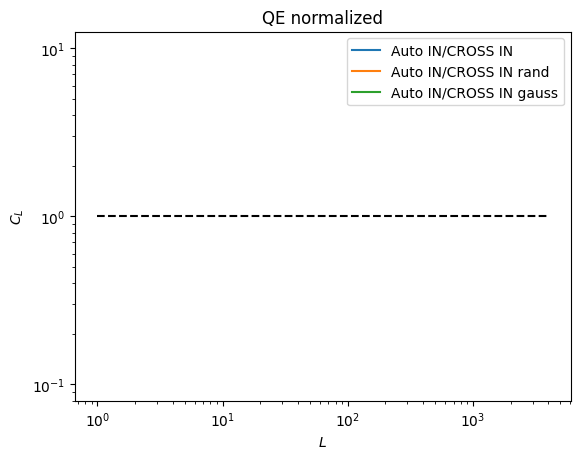

In [35]:
plt.title("QE normalized")

for k, autoin in auto_in.items():
    # plt.loglog(mean(crosses_dict[k]), label = f'Cross {k}')
    plt.loglog(mean(autoin) / mean(crosses_dict[k]), label=f"Auto IN/CROSS IN {k}")
plt.hlines(1, 1, 4000, ls="--", color="black")
plt.legend()

plt.xlabel(r"$L$")
plt.ylabel(r"$C_L$")

In [37]:
auto = {k: [hp.alm2cl(p, p) for p in plms] for k, plms in plms_QE_dict.items()}

In [38]:
rhos = {
    k: mean(cross) / np.sqrt(mean(auto[k]) * mean(auto_in[k]))
    for k, cross in crosses_dict.items()
}

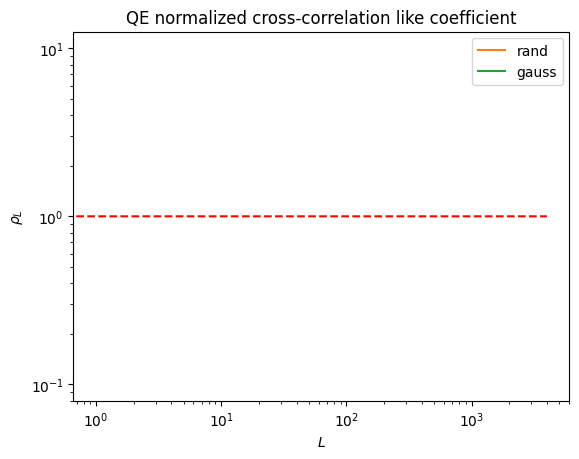

In [39]:
plt.title("QE normalized cross-correlation like coefficient")

for k, rho in rhos.items():
    plt.loglog(rho, label=f"{k}")

plt.loglog(np.arange(0, 4000), np.ones(4000), "r--")

plt.xlabel(r"$L$")
plt.ylabel(r"$\rho_L$")

plt.legend()

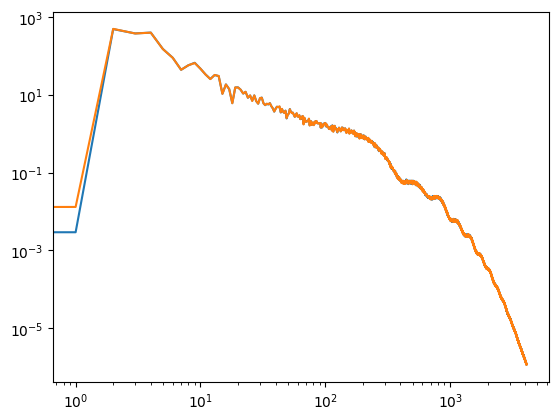

In [40]:
aa = hp.read_alm("/home/users/d/darwish/scratch/n32/S4Giulio/cmbs/sim_0003_tlm.fits")
bb = hp.read_alm(
    "/home/users/d/darwish/scratch/n32/S4GiulioBornLogDoubleSkew/cmbs/sim_0003_tlm.fits"
)

cc = hp.read_alm(
    "/home/users/d/darwish/scratch/n32/S4GiulioBornLogDoubleSkew/cmbs/sim_0003_tlm.fits"
)

plt.loglog(hp.alm2cl(aa, aa))
plt.loglog(hp.alm2cl(bb, cc))

## Iterative Reconstruction

In [41]:
from lenscarf.iterators import statics

In [42]:
iters = [0, 1, 2]

In [71]:
SOdict.keys()

dict_keys(['', 'rand', 'gauss'])

In [116]:
temps

{'': '/home/users/d/darwish/scratch/n32/S4GiulioBorn/lenscarfrecs',
 'rand': '/home/users/d/darwish/scratch/n32/S4GiulioBornRand/lenscarfrecs',
 'gauss': '/home/users/d/darwish/scratch/n32/S4GiulioBornGauss/lenscarfrecs'}

In [95]:
plms_dict = {
    c: (
        statics.rec.load_plms(f"{temps[c]}/{key}_sim{i:04}{version}/", iters)
        for i in simset
    )
    for c in SOdict.keys()
}

In [92]:
combined_.shape

(0,)

In [96]:
rho_iters_dict = {}
crosses_dict = {}
autos_dict = {}
autos_in_dict = {}

combined_dict = {}

for k, plms in plms_dict.items():
    # plms list over simulation indices
    auto_in_temp = auto_in[k]  # one for each simulation index
    combined_ = np.array(
        [
            [[hp.alm2cl(p_, pin), hp.alm2cl(p_)] for p_ in plm_]
            for plm_, pin in zip(plms, input_plm_maps[k])
        ]
    )
    # combined_dict[k] = combined_
    # cs_ = np.array([[hp.alm2cl(p_, pin) for p_ in plm_] for plm_, pin in zip(plms, input_plm_maps[k])])
    # as_ = np.array([[hp.alm2cl(p_) for p_ in plm_] for plm_ in plms])

    cs_ = combined_[:, :, 0, :]
    as_ = combined_[:, :, 1, :]

    crosses_dict[k] = cs_
    autos_dict[k] = as_
    autos_in_dict[k] = auto_in_temp

    rhos_list = mean(cs_) / np.sqrt(mean(as_) * mean(auto_in_temp))
    rho_iters_dict[k] = rhos_list

Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim


/tmp/ipykernel_208536/4261673800.py:23: RuntimeWarning: invalid value encountered in divide
  rhos_list = mean(cs_)/np.sqrt(mean(as_)*mean(auto_in_temp))


Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim


In [117]:
crosses_dict[""] / crosses_dict["gauss"]

/tmp/ipykernel_208536/4135433249.py:1: RuntimeWarning: invalid value encountered in divide
  crosses_dict[""]/crosses_dict["gauss"]


array([[[nan, nan,  1., ...,  1.,  1.,  1.],
        [nan,  1.,  1., ...,  1.,  1.,  1.],
        [nan,  1.,  1., ...,  1.,  1.,  1.]],

       [[nan, nan,  1., ...,  1.,  1.,  1.],
        [nan,  1.,  1., ...,  1.,  1.,  1.],
        [nan,  1.,  1., ...,  1.,  1.,  1.]],

       [[nan, nan,  1., ...,  1.,  1.,  1.],
        [nan,  1.,  1., ...,  1.,  1.,  1.],
        [nan,  1.,  1., ...,  1.,  1.,  1.]],

       ...,

       [[nan, nan,  1., ...,  1.,  1.,  1.],
        [nan,  1.,  1., ...,  1.,  1.,  1.],
        [nan,  1.,  1., ...,  1.,  1.,  1.]],

       [[nan, nan,  1., ...,  1.,  1.,  1.],
        [nan,  1.,  1., ...,  1.,  1.,  1.],
        [nan,  1.,  1., ...,  1.,  1.,  1.]],

       [[nan, nan,  1., ...,  1.,  1.,  1.],
        [nan,  1.,  1., ...,  1.,  1.,  1.],
        [nan,  1.,  1., ...,  1.,  1.,  1.]]])

: 

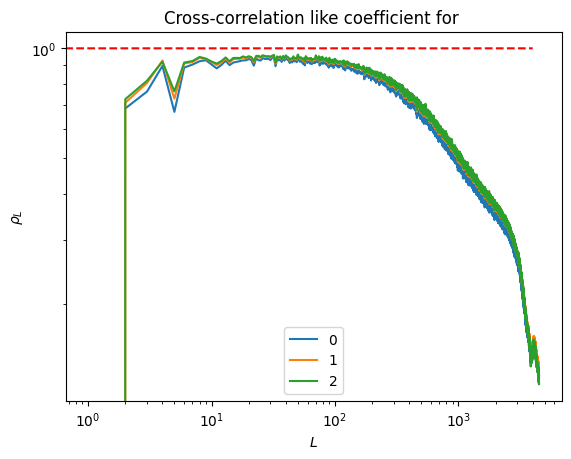

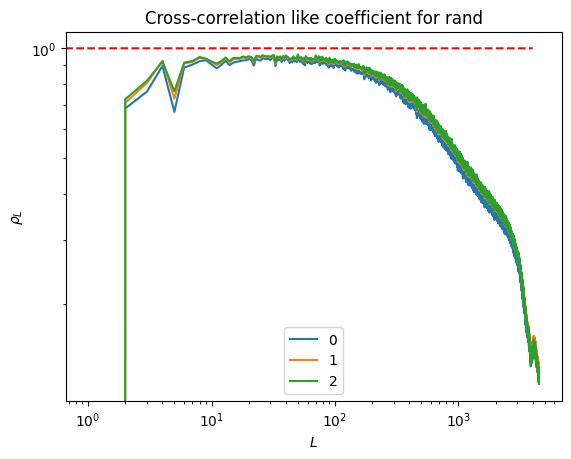

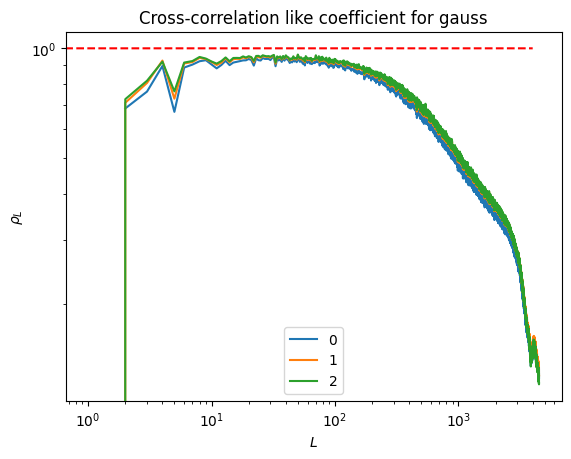

In [98]:
colors = []
for k, rhos in rho_iters_dict.items():
    plt.title(f"Cross-correlation like coefficient for {k}")
    [plt.loglog(rho, label=f"{i}") for i, rho in enumerate(rhos)]
    plt.xlabel(r"$L$")
    plt.ylabel(r"$\rho_L$")
    plt.legend()
    plt.loglog(np.arange(0, 4000), np.ones(4000), "r--")
    plt.show()

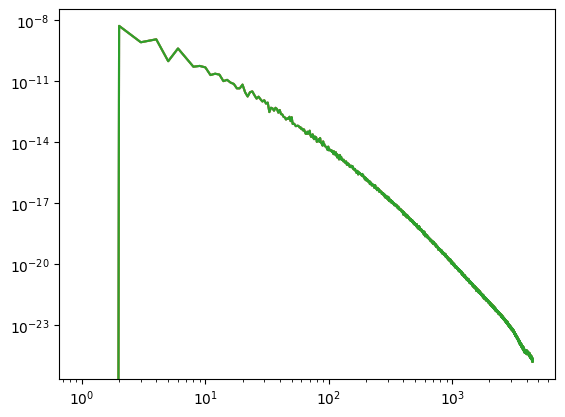

In [99]:
for k, c in crosses_dict.items():
    plt.loglog(mean(np.nan_to_num(c)[0]))

## Check Normalization

### N0 contribution

In [109]:
from plancklens import n0s

# checking theory dependence on noise and beam
n0iter = n0s.get_N0_iter(
    qe_key=qe_key,
    nlev_t=nlev_t,
    nlev_p=nlev_p,
    beam_fwhm=beam,
    cls_unl_fid=cls_unl_fid,
    lmin_cmb=lmin_tlm,
    lmax_cmb=lmax_ivf,
    itermax=max(iters),
    lmax_qlm=lmax_qlm,
    ret_delcls=True,
)

OSError: libifport.so.5: cannot open shared object file: No such file or directory

In [ ]:
N0sb, N0sunb, Resp, cls_plen, cls_plen_true, _ = n0iter

In [ ]:
from lenscarf.utils import cli
from lenscarf.utils_hp import gauss_beam
from plancklens import qresp

transf_tlm = gauss_beam(SO.beam / 180 / 60 * np.pi, lmax=SO.lmax_ivf) * (
    np.arange(SO.lmax_ivf + 1) >= lmin_cmb
)
ftl = cli(
    cls_len["tt"][: SO.lmax_ivf + 1]
    + (nlev_t / 180 / 60 * np.pi) ** 2 * cli(transf_tlm**2)
) * (transf_tlm > 0)

ftlu = cli(
    cls_unl["tt"][: SO.lmax_ivf + 1]
    + (nlev_t / 180 / 60 * np.pi) ** 2 * cli(transf_tlm**2)
) * (transf_tlm > 0)

R = qresp.get_response(
    "ptt",
    lmax_cmb,
    "p",
    SO.cls_len,
    SO.cls_weight,
    {"e": ftl * 0.0, "b": ftl * 0.0, "t": ftl},
    lmax_qlm=SO.lmax_qlm,
)[0]

In [ ]:
clppfid = cls_unl["pp"][0 : len(mean(auto_in_temp))]

/tmp/ipykernel_197214/3565291942.py:5: RuntimeWarning: divide by zero encountered in divide
  n0calculated = 1/R if itr == 0 else n0calculated


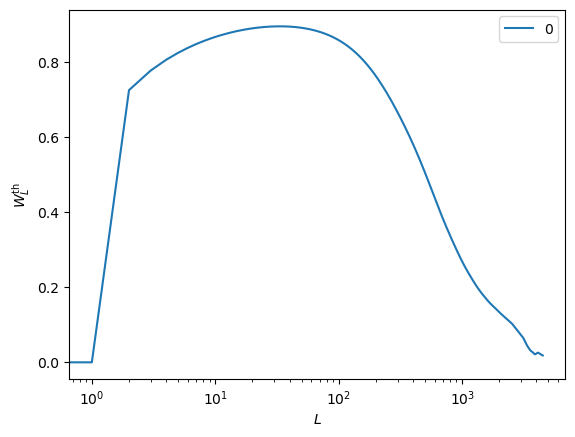

In [ ]:
p = None
wfs_th = {}
for itr in iters:
    n0calculated = n0iter[0][itr]
    n0calculated = 1 / R if itr == 0 else n0calculated
    # n1calculated = n0iter[0][0]**2.*n1_tt if itr == 0 else 0
    n1calculated = 0
    WL = clppfid / (clppfid + n0calculated + n1calculated)
    # color = None if p is None else p[0].get_color()
    p = plt.plot(WL, label=f"{itr}")
    wfs_th[itr] = WL
plt.xlabel(r"$L$")
plt.ylabel(r"$W^{\rm{th}}_L$")
plt.xscale("log")
plt.legend(loc="best")

In [107]:
from plancklens.n1 import n1 as n1s

In [108]:
N0s, N0s_unbiased, Response, delcls_fid, delcls_true, fals = n0iter

In [33]:
lib_dir = "/pscratch/sd/o/omard/n1TTiterativeGiulioS4Paper"

n1_tts_dict = {}

n1_tts = []
n1_tts_extra = []
itermax = max(iters) + 1
key = "ptt"

for i in range(itermax):
    lib_dir_ = lib_dir + f"{i}"
    n1lib = n1s.library_n1(
        lib_dir_,
        delcls_fid[i]["tt"],
        delcls_fid[i]["te"],
        delcls_fid[i]["ee"],
        SO.lmax_qlm,
        dL=10,
        lps=None,
    )
    ftl = fals[i]["tt"]
    fel = fals[i]["tt"]
    fbl = fals[i]["tt"]
    # ppres = 1/(1/Response[i]+1/pp)
    n1_tt, n1_tt_extra = n1lib.get_n1(
        key, "p", delcls_fid[i]["pp"], ftl, fel, fbl, SO.lmax_qlm
    )
    n1_tts += [n1_tt]

In [109]:
n1_tts = [0, 0]

In [110]:
Lmax = SO.lmax_qlm
Ls = np.arange(1, Lmax + 1)

/tmp/ipykernel_197214/2122714285.py:5: RuntimeWarning: divide by zero encountered in divide
  n0calculated = 1/R if itr == 0 else n0calculated
/tmp/ipykernel_197214/2122714285.py:8: RuntimeWarning: divide by zero encountered in divide
  n1calculated = 1/Response[itr]**2.*n1_tts[itr]
/tmp/ipykernel_197214/2122714285.py:8: RuntimeWarning: invalid value encountered in multiply
  n1calculated = 1/Response[itr]**2.*n1_tts[itr]


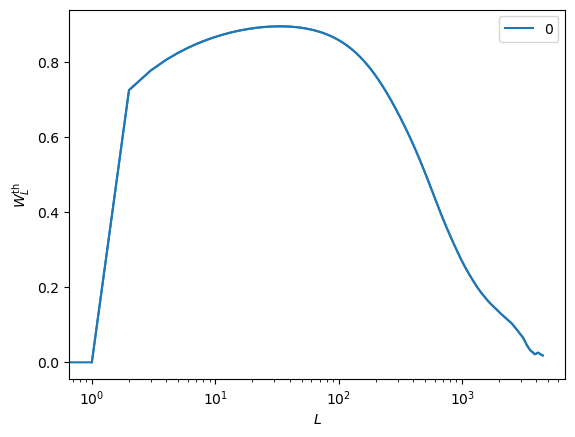

In [111]:
p = None
wfs_th = {}
for itr in iters:
    n0calculated = n0iter[0][itr]
    n0calculated = 1 / R if itr == 0 else n0calculated

    # n1calculated = 1/Response[itr]**2.*n1_tts[iters.index(itr)]
    n1calculated = 1 / Response[itr] ** 2.0 * n1_tts[itr]

    WL = clppfid / (clppfid + n0calculated + n1calculated)

    WL2 = clppfid / (clppfid + n0calculated)

    # color = None if p is None else p[0].get_color()
    p = plt.plot(WL, label=f"{itr}")
    plt.plot(WL2, color=p[0].get_color())
    wfs_th[itr] = WL
plt.xlabel(r"$L$")
plt.ylabel(r"$W^{\rm{th}}_L$")
plt.xscale("log")
plt.legend(loc="best")

/tmp/ipykernel_205162/2867874994.py:5: RuntimeWarning: divide by zero encountered in divide
  n0calculated = 1/R if itr == 0 else n0calculated
/tmp/ipykernel_205162/2867874994.py:8: RuntimeWarning: divide by zero encountered in divide
  n1calculated = 1/Response[itr]**2.*n1_tts[itr]
/tmp/ipykernel_205162/2867874994.py:8: RuntimeWarning: invalid value encountered in multiply
  n1calculated = 1/Response[itr]**2.*n1_tts[itr]
/tmp/ipykernel_205162/2867874994.py:15: RuntimeWarning: invalid value encountered in divide
  plt.plot(WL2/WL-1, label = f'{itr}')
/tmp/ipykernel_205162/2867874994.py:12: RuntimeWarning: invalid value encountered in divide
  WL2 = clppfid/(clppfid+n0calculated)


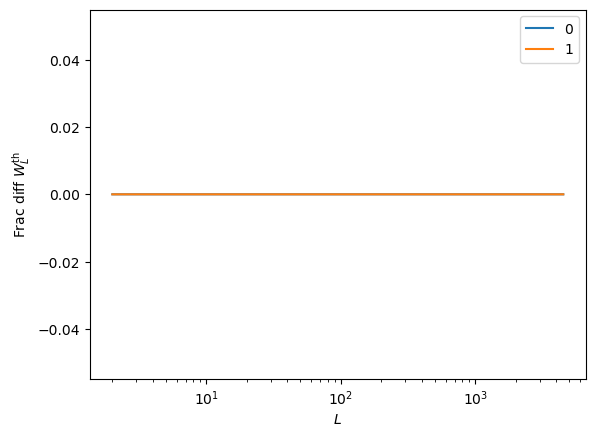

In [43]:
p = None
wfs_th = {}
for itr in iters:
    n0calculated = n0iter[0][itr]
    n0calculated = 1 / R if itr == 0 else n0calculated

    # n1calculated = 1/Response[itr]**2.*n1_tts[iters.index(itr)]
    n1calculated = 1 / Response[itr] ** 2.0 * n1_tts[itr]

    WL = clppfid / (clppfid + n0calculated + n1calculated)

    WL2 = clppfid / (clppfid + n0calculated)

    # color = None if p is None else p[0].get_color()
    plt.plot(WL2 / WL - 1, label=f"{itr}")
    wfs_th[itr] = WL
plt.xlabel(r"$L$")
plt.ylabel(r"Frac diff $W^{\rm{th}}_L$")
plt.xscale("log")
plt.legend(loc="best")

In [112]:
n1calculated = n0iter[0][0] ** 2.0 * n1_tts[iters.index(itr)]

## Getting sims based normalization from Gaussian simulations

In [100]:
sim_len_libs

{'': <itfgs.params.S4n32.SehgalSim at 0x2ba01443e230>,
 'rand': <itfgs.params.S4n32.SehgalSim at 0x2ba01443feb0>,
 'gauss': <itfgs.params.S4n32.SehgalSim at 0x2ba01443ef20>}

In [101]:
input_plm_maps_born_gaussian = {
    k: sim_len_libs[SOB.casogauss].get_sim_plm(k) for k in simset
}

Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim


In [102]:
plm_in_ins_born_gaussian = input_plm_maps_born_gaussian  # {k: palm_copy(d, lmax = lmax_qlm) for k, d in input_plm_maps_born_gaussian.items()} #GF input postborn + NL map

auto_in_born_gaussian = np.array(
    [
        hp.alm2cl(palm_copy(plm_in, lmax=lmax_qlm))
        for plm_in in plm_in_ins_born_gaussian.values()
    ]
)

In [103]:
crosses_born_gaussian = np.array(
    [
        [
            hp.alm2cl(palm_copy(plm_in, lmax=lmax_qlm), plm_rec)
            for plm_rec in statics.rec.load_plms(
                f"{gettemplensing(SOB.casogauss)}/{key}_sim{k:04}{version}", iters
            )
        ]
        for k, plm_in in plm_in_ins_born_gaussian.items()
    ]
)

/tmp/ipykernel_208536/4083962587.py:4: RuntimeWarning: invalid value encountered in divide
  norms_gauss_born_gaussian = np.nanmean(np.swapaxes(crosses_born_gaussian, 0, 1)/auto_in_born_gaussian, axis = 1)
/tmp/ipykernel_208536/4083962587.py:4: RuntimeWarning: Mean of empty slice
  norms_gauss_born_gaussian = np.nanmean(np.swapaxes(crosses_born_gaussian, 0, 1)/auto_in_born_gaussian, axis = 1)


Text(0.5, 1.0, 'Empirical sims normalization for Gaussian simulations from kappa Born power')

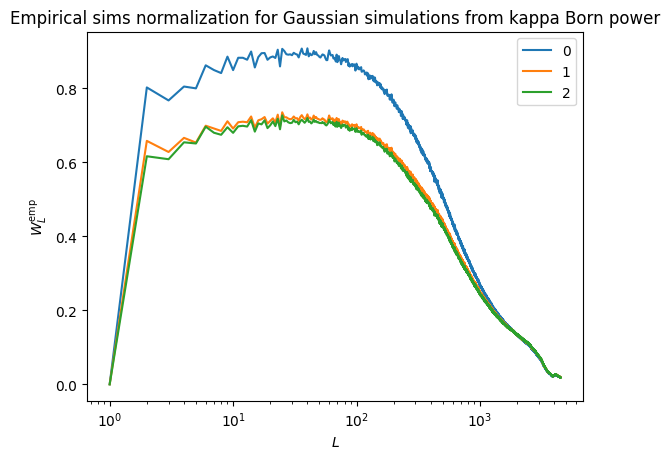

In [104]:
norms_gauss_born_gaussian = {}

# always assume in this notebook that you have all iterations from 0 to itmax in iters
norms_gauss_born_gaussian = np.nanmean(
    np.swapaxes(crosses_born_gaussian, 0, 1) / auto_in_born_gaussian, axis=1
)
for itr in iters:
    plt.plot(norms_gauss_born_gaussian[itr], label=itr)
plt.legend()
plt.xscale("log")
plt.ylabel(r"$W_L^{\rm{emp}}$")
plt.xlabel("$L$")
plt.title("Empirical sims normalization for Gaussian simulations from kappa Born power")

In [ ]:
"""
#norms_gauss_born_gaussian = {}

#always assume in this notebook that you have all iterations from 0 to itmax in iters
#norms_gauss_born_gaussian = np.nanmean(np.swapaxes(crosses_born_gaussian, 0, 1), axis = 1)
for itr in iters:
    p = plt.plot(norms_gauss_born_gaussian[itr], label = itr)
    plt.plot(wfs_th[itr], ls = '--', color = p[0].get_color())
plt.legend()
plt.xscale('log')
plt.ylabel(r'$W_L$')
plt.xlabel('$L$')
plt.title('Comparing empirical sims normalization for Gaussian simulations from kappa Born power and theoretical expected one')
"""

"\n#norms_gauss_born_gaussian = {}\n\n#always assume in this notebook that you have all iterations from 0 to itmax in iters\n#norms_gauss_born_gaussian = np.nanmean(np.swapaxes(crosses_born_gaussian, 0, 1), axis = 1)\nfor itr in iters:\n    p = plt.plot(norms_gauss_born_gaussian[itr], label = itr)\n    plt.plot(wfs_th[itr], ls = '--', color = p[0].get_color())\nplt.legend()\nplt.xscale('log')\nplt.ylabel(r'$W_L$')\nplt.xlabel('$L$')\nplt.title('Comparing empirical sims normalization for Gaussian simulations from kappa Born power and theoretical expected one')\n"

## Correcting with empirical Gaussian kappa power Born derived normalization

In [105]:
autos_in_dict.keys()

dict_keys(['', 'rand', 'gauss'])

In [106]:
norms_gauss_born_gaussian

array([[            nan,  0.00000000e+00,  8.02134661e-01, ...,
         1.79390367e-02,  1.84722331e-02,  1.80291639e-02],
       [            nan, -1.40604220e-15,  6.57764872e-01, ...,
         1.81600407e-02,  1.87720795e-02,  1.84016669e-02],
       [            nan, -1.70376362e-15,  6.16189048e-01, ...,
         1.79085945e-02,  1.86096040e-02,  1.82358882e-02]])

/tmp/ipykernel_208536/435351773.py:6: RuntimeWarning: invalid value encountered in divide
  plt.plot(cross_element/norms_gauss_born_gaussian[it]/autoin_, label = it)


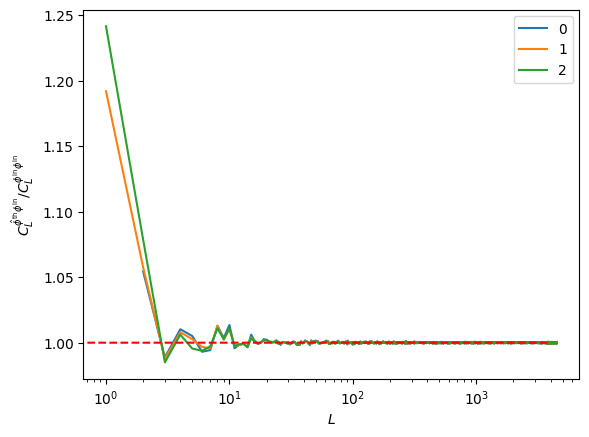

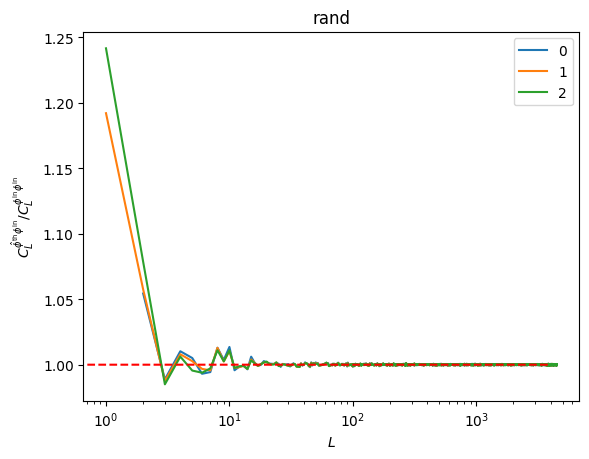

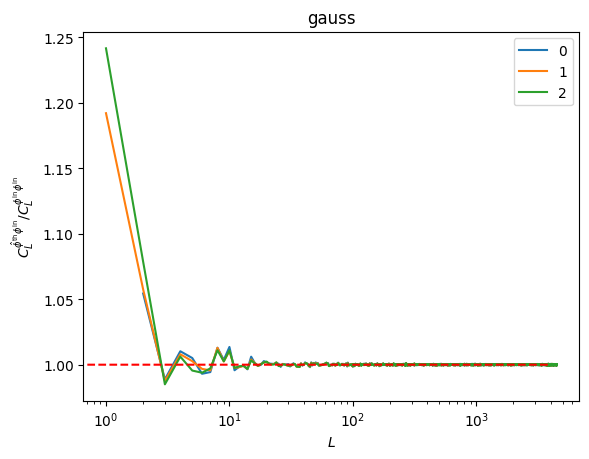

In [107]:
for k, cross_ in crosses_dict.items():
    autoin_ = mean(autos_in_dict[k])
    plt.title(f"{k}")
    cross = mean(cross_)
    for it, cross_element in enumerate(cross):
        plt.plot(cross_element / norms_gauss_born_gaussian[it] / autoin_, label=it)
    plt.plot(np.arange(0, 4000), np.ones(4000), "r--")
    plt.xlabel(r"$L$")
    plt.ylabel(
        r"$C^{\hat{\phi}^{\rm{th}}\phi^{\rm{in}}}_L/C^{\phi^{\rm{in}}\phi^{\rm{in}}}_L$"
    )
    plt.xscale("log")
    plt.legend()
    plt.show()

In [108]:
import scipy
from scipy import signal


def bin_theory(l, lcl, bin_edges):
    sums = scipy.stats.binned_statistic(l, l, statistic="sum", bins=bin_edges)
    cl = scipy.stats.binned_statistic(l, lcl, statistic="sum", bins=bin_edges)
    cl = cl[0] / sums[0]
    return cl


bin_edges = np.arange(10, 4000, 140)

In [109]:
std = lambda x: np.std(x, axis=0)

In [110]:
autos_in_dict.keys()

dict_keys(['', 'rand', 'gauss'])

In [111]:
cases

['', 'rand', 'gauss']

In [112]:
# CONVENTION: cases[0] has the non-Gaussian signal

In [113]:
title = cases[0]

/tmp/ipykernel_208536/2624011834.py:20: RuntimeWarning: invalid value encountered in divide
  value = process((A-B)/norms_gauss_born_gaussian[it]/autoin_)


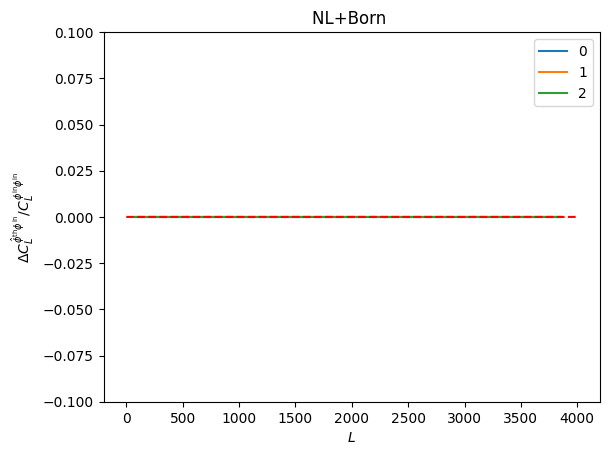

In [114]:
# plt.figure(figsize = (3, 6))
autoin_ = mean(autos_in_dict[cases[0]])
plt.title(f"NL+Born {title}")

cross_A = mean(crosses_dict[cases[0]])
cross_B = mean(crosses_dict[cases[1]])

std_A_B = std(crosses_dict[cases[0]] - crosses_dict[cases[1]])

for it, cross_elements in enumerate(zip(cross_A, cross_B)):
    A, B = cross_elements
    ls_ = np.arange(0, len(A))
    elbin = ls_
    process = lambda x: signal.savgol_filter(x, 53, 3)  # window size used for filtering
    # process = lambda x: x
    process = lambda x: bin_theory(ls_, ls_ * x, bin_edges)
    elbin = (bin_edges[:-1] + bin_edges[1:]) / 2

    value = process((A - B) / norms_gauss_born_gaussian[it] / autoin_)

    if it == 0:
        valuebase = value
    else:
        valuebase = np.c_[valuebase, value]
    # plt.fill_between(elbin, value-svalue/np.sqrt(Nsims), value+svalue/np.sqrt(Nsims), alpha = 0.4)
    plt.plot(elbin, value, label=it)

np.savetxt(f"cross_n32_{cases[0]}.txt", np.c_[elbin, valuebase])

plt.plot(np.arange(0, 4000), np.zeros(4000), "r--")
plt.xlabel(r"$L$")
plt.ylabel(
    r"$\Delta C^{\hat{\phi}^{\rm{th}}\phi^{\rm{in}}}_L/C^{\phi^{\rm{in}}\phi^{\rm{in}}}_L$"
)
# plt.xscale('log')
plt.ylim(-0.1, 0.1)
plt.legend()
plt.show()

/tmp/ipykernel_208536/633991711.py:19: RuntimeWarning: invalid value encountered in divide
  value = process((A-B)/norms_gauss_born_gaussian[it]**2/autoin_)
/tmp/ipykernel_208536/633991711.py:20: RuntimeWarning: invalid value encountered in divide
  svalue = process((sA_B)/norms_gauss_born_gaussian[it]**2/autoin_)


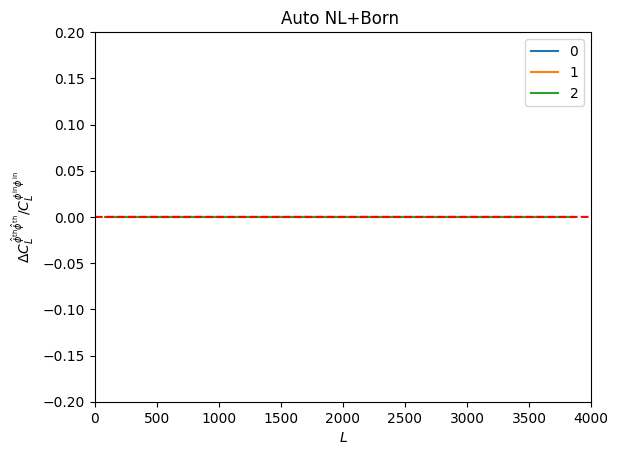

In [115]:
autoin_ = mean(autos_in_dict[cases[0]])
plt.title(f"Auto NL+Born {title}")

cross_A = mean(autos_dict[cases[0]])
cross_B = mean(autos_dict[cases[1]])

std_A_B = std(autos_dict[cases[0]] - crosses_dict[cases[1]])

for it, cross_elements in enumerate(zip(cross_A, cross_B, std_A_B)):
    A, B, sA_B = cross_elements
    ls_ = np.arange(0, len(A))
    elbin = ls_
    process = lambda x: signal.savgol_filter(x, 53, 3)  # window size used for filtering
    process = lambda x: x
    process = lambda x: bin_theory(ls_, ls_ * x, bin_edges)
    elbin = (bin_edges[:-1] + bin_edges[1:]) / 2

    value = process((A - B) / norms_gauss_born_gaussian[it] ** 2 / autoin_)
    svalue = process((sA_B) / norms_gauss_born_gaussian[it] ** 2 / autoin_)
    # plt.fill_between(elbin, value-svalue/np.sqrt(Nsims), value+svalue/np.sqrt(Nsims), alpha = 0.4)
    plt.plot(elbin, value, label=it)

    if it == 0:
        valuebase = value
    else:
        valuebase = np.c_[valuebase, value]

np.savetxt(f"auto_n32_{cases[0]}.txt", np.c_[elbin, valuebase])
plt.plot(np.arange(0, 4000), np.zeros(4000), "r--")
plt.xlabel(r"$L$")
plt.ylabel(
    r"$\Delta C^{\hat{\phi}^{\rm{th}}\hat{\phi}^{\rm{th}}}_L/C^{\phi^{\rm{in}}\phi^{\rm{in}}}_L$"
)
# plt.xscale('log')
plt.ylim(-0.2, 0.2)
plt.xlim(0, 4000)

plt.legend()
plt.show()

### Comparing Sims

In [116]:
cases_to_compare = [SOB.casostd, SOB.casolog, SOB.casologdoubleskew]

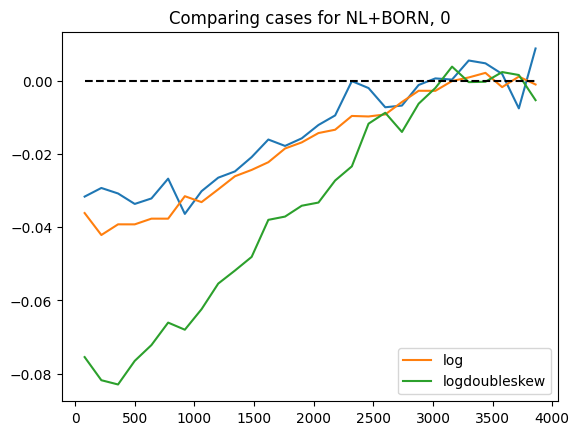

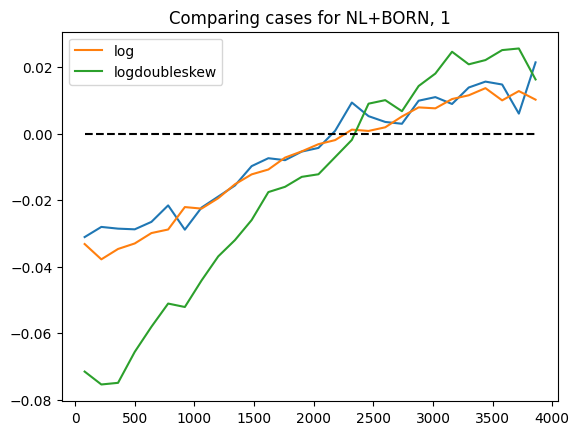

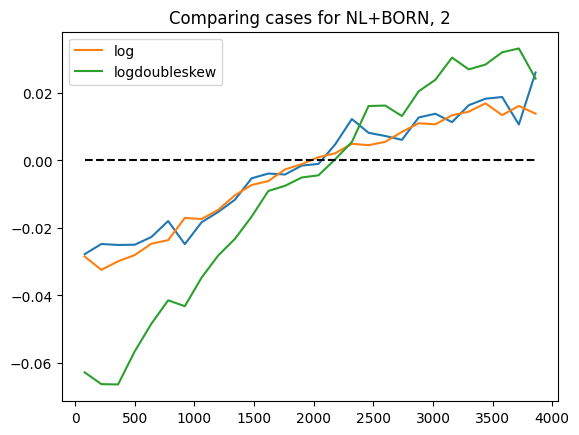

In [121]:
for iteration in iters:
    plt.title(f"Comparing cases for NL+BORN, {iteration}")
    for c_ in cases_to_compare:
        data = np.loadtxt(f"cross_n32_{c_}.txt")
        elbin, valuebase = data[:, 0], data[:, iteration + 1]
        plt.plot(elbin, valuebase, label=c_)
    plt.plot(elbin, np.zeros(len(elbin)), "k--")
    plt.legend()
    plt.show()

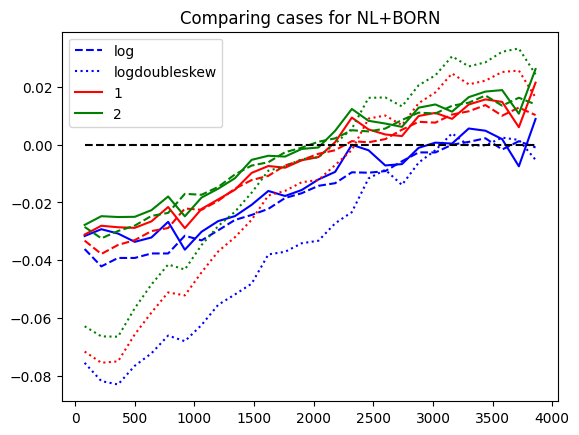

In [124]:
colors = ["blue", "red", "green"]
styles = ["-", "--", ":"]

for iteration in iters:
    plt.title(f"Comparing cases for NL+BORN")
    for c_, style in zip(cases_to_compare, styles):
        data = np.loadtxt(f"cross_n32_{c_}.txt")
        elbin, valuebase = data[:, 0], data[:, iteration + 1]
        plt.plot(
            elbin,
            valuebase,
            label=c_
            if iteration == 0
            else (iteration if c_ == cases_to_compare[0] else None),
            color=colors[iteration],
            ls=style,
        )
plt.plot(elbin, np.zeros(len(elbin)), "k--")
plt.legend()
plt.show()